In [1]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import imageio
import numpy.ma as ma
from mask import select_region
from field_importer import get_field
import pandas as pd
import mask
from select_type import select_type
from mask import get
import seaborn as sns
import math
from cartoplot import cartoplot
import matplotlib.pyplot as plt
from scipy.stats import linregress

/home/robbie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/robbie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/robbie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/robbie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/robbie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indi

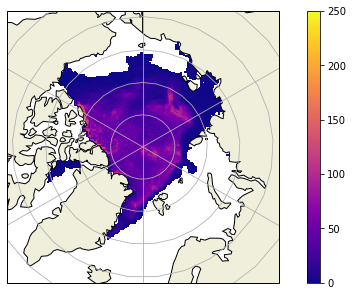

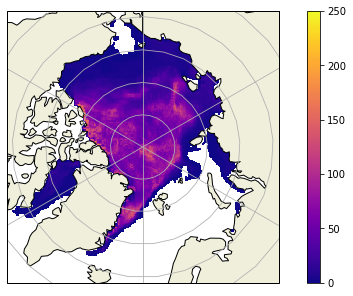

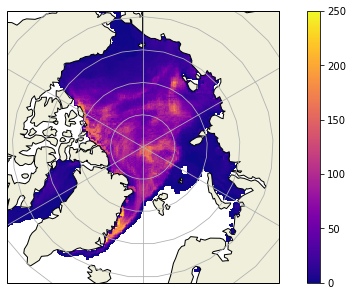

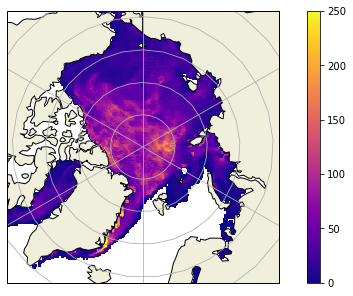

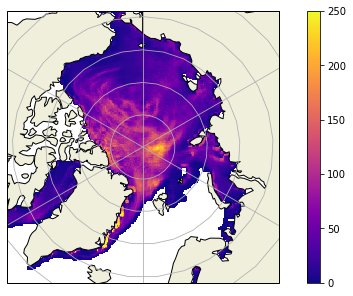

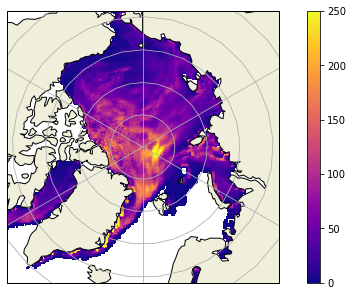

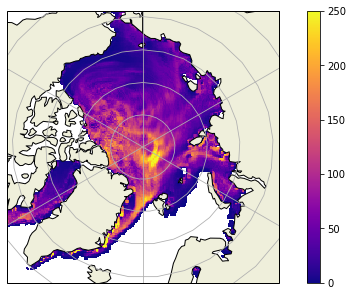

In [2]:
monthlist = ["10","11","12","01","02","03","04"]
year = 2016
for month in monthlist:
    d = get_field('snowmodel',month=month,year=year,resolution=361,variable='M2 SWE')

    cartoplot(d['lon'],d['lat'],d['field'],color_scale=(0,250))

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77

/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.

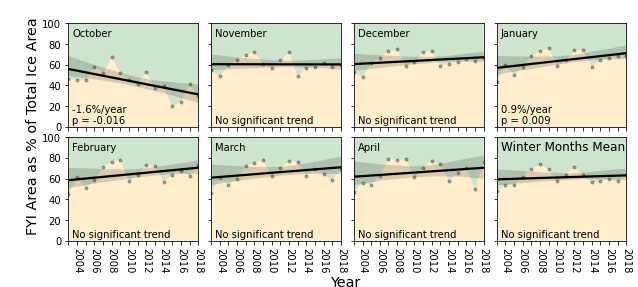

In [2]:
monthlist = ["10","11","12","01","02","03","04"]
yearlist = list(range(2003,2019))

dict_of_lists = {}

for month in monthlist:

    fyi_frac_list = []

    for year in yearlist:

        ones = np.ones((361,361))
        ones = select_region('basin', ones)
        fyi = select_type('fyi',ones,year,month)
        myi = select_type('myi',ones,year,month)
        fyi_a = np.nansum(fyi)
        myi_a = np.nansum(myi)

        fyi_frac = fyi_a/(fyi_a+myi_a)
        
        fyi_frac_list.append(fyi_frac)
    
    
    
    dict_of_lists[month] = fyi_frac_list
    
fig = plt.figure(figsize=(10,4))

month_name_list = ["October","November","December","January", "February", "March", "April"]

winter_running_tot = np.zeros(len(yearlist))

for subplot_counter, month in enumerate(dict_of_lists.keys(), 1):
    
    # Analyse
    
    timeseries = dict_of_lists[month]
    fill = [1-i for i in timeseries]
    stats = linregress(yearlist,timeseries)
    trendline = [stats[0]*x + stats[1] for x in yearlist]
    
    winter_running_tot = np.add(winter_running_tot, timeseries)
    
    # Plot
    
    ax = plt.subplot(2,4,subplot_counter)
    
    
    ax = plt.stackplot(yearlist,  timeseries, fill, colors=['orange','green'], alpha=0.2)
        
    ax = sns.regplot(yearlist,timeseries,
                scatter_kws={'color':'k', 'alpha':0.3},
                line_kws = {'color':'k', 'alpha':1},
                ci = 95, marker='.')
    
    ax = plt.annotate(month_name_list[subplot_counter-1],
                                  xy = (0.03,0.87),xycoords='axes fraction',
                                  ha='left',fontsize="medium",color='k')
    
    plt.ylim(0,1)
    plt.xlim(2003,2018)

    
    xlabels = [x if x%2 == 0 else ""  for x in yearlist]
    
    if stats[3] < 0.05:
        plt.annotate(f'{np.around(stats[0]*100, decimals=1)}%/year \np = {np.around(stats[0], decimals=3)}',
                                  xy = (0.03,0.03),xycoords='axes fraction',
                                  ha='left',color='k',fontsize='medium')
    else:
        plt.annotate(f'No significant trend',
                                  xy = (0.03,0.03),xycoords='axes fraction',
                                  ha='left',fontsize="medium",color='k')
    
    if subplot_counter < 5:
        plt.xticks(ticks=yearlist,labels=[])
    else:
        plt.xticks(ticks=yearlist,labels=xlabels,rotation=270,fontsize='medium')
        
    if subplot_counter in [1,5]:
        plt.yticks(np.arange(0,11,2)/10,labels=np.arange(0,11,2)*10,fontsize='medium')
    else:
        plt.yticks(np.arange(0,11,2)/10,labels=[])

###################################################
        
# Plot winter mean in final panel        
        
winter_mean = winter_running_tot/subplot_counter
fill = [1-i for i in winter_mean]

ax = plt.subplot(2,4,subplot_counter+1)
ax = plt.stackplot(yearlist,  winter_mean, fill, colors=['orange','green'], alpha=0.2)

ax = sns.regplot(yearlist,winter_mean,
            scatter_kws={'color':'k', 'alpha':0.3},
            line_kws = {'color':'k', 'alpha':1},
            ci = 95, marker='.')
ax = plt.annotate('Winter Months Mean',
                  xy = (0.03,0.87),xycoords='axes fraction',
                  ha='left',fontsize="large",color='k')
ax = plt.annotate(f'No significant trend',fontsize='medium',
              xy = (0.03,0.03),xycoords='axes fraction',
              ha='left',color='k')
plt.yticks(np.arange(0,11,2)/10,labels=[])
plt.xticks(ticks=yearlist,labels=xlabels,rotation=270,fontsize='medium')
plt.ylim(0,1)
plt.xlim(2003,2018)

###################################################


plt.annotate('FYI Area as % of Total Ice Area',
             xy = (0.04,0.56),
             xycoords="figure fraction",
             rotation=90,
             fontsize="x-large",
             va='center')

plt.annotate("Year",
             xy = (0.54,0.0),
             xycoords="figure fraction",
             fontsize="x-large",
             ha='center')

plt.subplots_adjust(wspace=0.1, hspace=0.1)  

plt.savefig("/home/robbie/Dropbox/Apps/Overleaf/SnowModel-LG_Paper/Sup_Figs/ice_type_monthly_trends.png",dpi=600,bbox_inches='tight')


plt.show()


In [3]:
monthlist = ["10","11","12","01","02","03","04"]
yearlist = list(range(2003,2019))

dict_of_lists = {}

for month in monthlist:

    mean_swe_list = []

    for year in yearlist:

        swe = get_field('mw99',year=year,month=month,variable='SWE',resolution=361)['field']
        swe = select_region('basin', swe)
        mean_swe_list.append(np.nanmean(swe))
 
    
    dict_of_lists[month] = mean_swe_list

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77

/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.masked_where(get('lat') > latitude, array)
/home/robbie/custom_modules/mask.py:77: RuntimeWarning: invalid value encountered in greater
  array = ma.

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


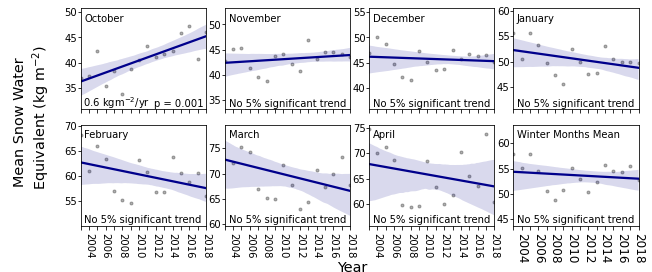

In [4]:
   
fig = plt.figure(figsize=(10,4))

month_name_list = ["October","November","December","January", "February", "March", "April"]

winter_running_tot = np.zeros(len(yearlist))

for subplot_counter, month in enumerate(dict_of_lists.keys(), 1):
    
    # Analyse
    
    timeseries = dict_of_lists[month]
    stats = linregress(yearlist,timeseries)
    trendline = [stats[0]*x + stats[1] for x in yearlist]
    
    winter_running_tot = np.add(winter_running_tot, timeseries)
    
    # Plot
    
    ax = plt.subplot(2,4,subplot_counter)
    
    
    ax.tick_params('y',pad=0)
        
    
    
#     ax = plt.scatter(yearlist,  timeseries, color='orange', alpha=0.2)
        
    ax = sns.regplot(yearlist,timeseries,
                scatter_kws={'color':'k', 'alpha':0.3},
                line_kws = {'color':'darkblue', 'alpha':1},
                ci = 95, marker='.')
    
    ax = plt.annotate(month_name_list[subplot_counter-1],
                                  xy = (0.03,0.87),xycoords='axes fraction',
                                  ha='left',fontsize="medium",color='k')
    y_mid = np.mean(timeseries)
    plt.ylim(y_mid-10,y_mid+10)
    plt.xlim(2003,2018)

    
    xlabels = [x if x%2 == 0 else ""  for x in yearlist]
    
    if stats[3] < 0.05:
        
        unit = r'kgm$^{-2}$/yr'
        
        plt.annotate(rf'{np.around(stats[0], decimals=2)} {unit}' ,
                                  xy = (0.02,0.03),
                                  xycoords='axes fraction',
                                  ha='left',color='k',fontsize='medium')
                
        plt.annotate(f'p = {np.around(stats[3], decimals=3)}',
                                  xy = (0.98,0.03),xycoords='axes fraction',
                                  ha='right',color='k',fontsize='medium')
                    
    else:
        plt.annotate(f'No 5% significant trend',
                                  xy = (0.03,0.03),xycoords='axes fraction',
                                  ha='left',fontsize="medium",color='k')
    
    if subplot_counter < 5:
        plt.xticks(ticks=yearlist,labels=[])
    else:
        plt.xticks(ticks=yearlist,labels=xlabels,rotation=270,fontsize='medium')
        
#     if subplot_counter in [1,5]:
#         plt.yticks(np.linspace(0,1,11),labels=np.linspace(0,100,11,dtype=int),fontsize='large')
#     else:
#         plt.yticks(np.linspace(0,1,11),labels=[])

###################################################
        
# Plot winter mean in final panel        
        
winter_mean = winter_running_tot/subplot_counter
fill = [1-i for i in winter_mean]

ax = plt.subplot(2,4,subplot_counter+1)

ax.tick_params('y',pad=0)
        
# ax = plt.scatter(yearlist,  winter_mean, color='orange', alpha=0.2)

ax = sns.regplot(yearlist,winter_mean,
            scatter_kws={'color':'k', 'alpha':0.3},
            line_kws = {'color':'darkblue', 'alpha':1},
            ci = 95, marker='.')

ax = plt.annotate('Winter Months Mean',
                  xy = (0.03,0.87),xycoords='axes fraction',
                  ha='left',fontsize="medium",color='k')
ax = plt.annotate(f'No 5% significant trend',fontsize='medium',
              xy = (0.03,0.03),xycoords='axes fraction',
              ha='left',color='k')

# plt.yticks(np.linspace(0,1,11),labels=[])
plt.xticks(ticks=yearlist,labels=xlabels,rotation=270,fontsize='large')
y_mid = np.mean(winter_mean)
plt.ylim(y_mid-10,y_mid+10)
plt.xlim(2003,2018)

###################################################

SWE_unit = r'(kg m$^{-2}$)'

plt.annotate(f'Mean Snow Water \n Equivalent {SWE_unit}',
             xy = (0.05,0.56),
             xycoords="figure fraction",
             rotation=90,
             fontsize="x-large",
             ha = 'center',
             va='center')

plt.annotate("Year",
             xy = (0.54,0.0),
             xycoords="figure fraction",
             fontsize="x-large",
             ha='center')

plt.subplots_adjust(wspace=0.15, hspace=0.15)  

plt.savefig("/home/robbie/Dropbox/Apps/Overleaf/SnowModel-LG_Paper/Sup_Figs/SWE_monthly_trends.png",dpi=600,bbox_inches='tight')


plt.show()

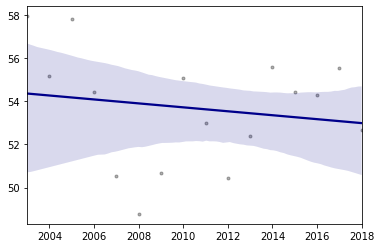

In [5]:
ax = sns.regplot(yearlist,winter_mean,
            scatter_kws={'color':'k', 'alpha':0.3},
            line_kws = {'color':'darkblue', 'alpha':1},
            ci = 95, marker='.')

In [8]:
ax.violinplot()
plt.show()

TypeError: violinplot() missing 1 required positional argument: 'dataset'

[1, 3, 5, 4, nan, 2, 6, 4, 5, 3, nan, 7, 5, 6, 4, 9, 7, 5, nan, 8, 7, 9]
[ True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True False  True  True  True]
[1. 3. 5. 4. 2. 6. 4. 5. 3. 7. 5. 6. 4. 9. 7. 5. 8. 7. 9.]


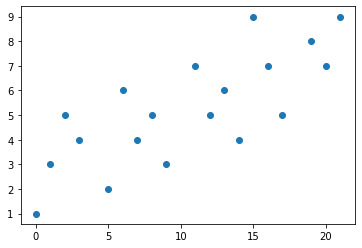

In [14]:
y = [1,3,5,4,np.nan,2,6,4,5,3,np.nan,7,5,6,4,9,7,5,np.nan,8,7,9]
x = list(range(len(y)))
plt.scatter(x,y)

def cleaner(no_nans, nans):
    print(nans)
    not_nan_array = ~ np.isnan(np.array(nans))
    print(not_nan_array)
    clean_x = np.array(no_nans)[not_nan_array]
    clean_y = np.array(nans)[not_nan_array]
    print(clean_y)
    return((list(clean_x),list(clean_y)))

output = cleaner(x,y)

# detrender(x,y)
    

In [10]:
r_codes  = {"Lakes":0,
        "Oceans":1,
        "Okhotsk":2,
        "Bering":3,
        "Hudson":4,
        "St Lawrence":5,
        "Baffin":6,
        "Greenland":7,
        "Barents":8,
        "Kara":9,
        "Laptev":10,
        "East Siberian":11,
        "Chukchi":12,
        "Beaufort":13,
        "Canadian Archipelago":14,
        "Central Arctic":15,
        "Land":20,
        "Coast":21}

def select_region(region,
                  array):
    
    mask_field = get('mask')
    
    if region in r_codes:
        
        code = r_codes[region]
    
        array = ma.masked_where(mask_field != code, array)
    
    elif region.lower() == 'basin':
        
        array = ma.masked_where(np.isin(mask_field,[8,9,10,11,12,13,15],invert=True), array)

    array = np.ma.filled(array.astype(float), np.nan)
    
    return(array)

In [11]:
def select_type(ice_type,
                array,
                year,
                month,
                basin=False):
    
    if (year > 2005) or (year == 2005 and int(month) > 6):
        dataset = 'osisaf'
    else:
        dataset = 'cds'
        
    if (ice_type.lower() == 'myi') or ice_type == 3:
        type_code = 3
    elif (ice_type.lower() == 'fyi') or ice_type == 2:
        type_code = 2
        
    type_field  = get_field(dataset,year=year,month=month,variable='ice_type',resolution=361)['field']
    
    array = ma.masked_where(type_field != type_code, array)
    
    if basin == True:
        
        array = select_region('basin',array)

    array = np.ma.filled(array.astype(float), np.nan)
        
    return(array)

def punch_lat_hole(array, latitude):
    
    array = ma.masked_where(mask.get('lat') > latitude, array)
    array = np.ma.filled(array.astype(float), np.nan)
    return(array)

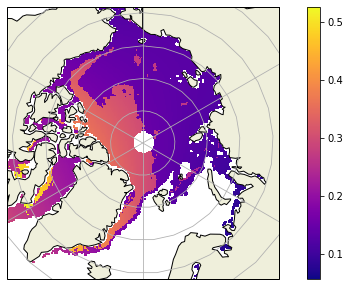

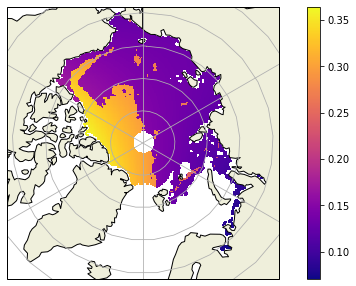

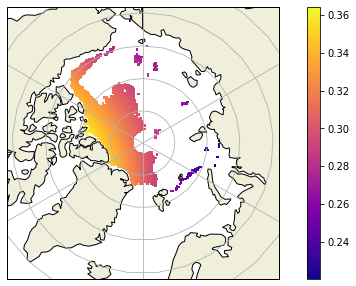

In [16]:
snow_depth = get_field('mw99',year=2012,month='02',variable='depth',resolution=361)['field']

cartoplot(mask.get('lon'),mask.get('lat'),snow_depth)

snow_depth = select_region('basin',snow_depth)

cartoplot(mask.get('lon'),mask.get('lat'),snow_depth)

snow_depth = select_type('MYI',snow_depth,year=2012,month='02')

cartoplot(mask.get('lon'),mask.get('lat'),snow_depth)


In [43]:
lon = mask.get('lon')
lat = mask.get('lat')
values = mask.get('mask')

ds = xr.Dataset( data_vars={'mask_values':(['x','y'],values)},
                 attrs={'origin':'Mask from Changes in Arctic melt season and implications for sea ice loss, J. C. Stroeve  T. Markus  L. Boisvert  J. Miller and A. Barrett',
                        'regions':                    str({ "Lakes":0,
                                                        "Oceans":1,
                                                        "Okhotsk":2,
                                                        "Bering":3,
                                                        "Hudson":4,
                                                        "St Lawrence":5,
                                                        "Baffin":6,
                                                        "Greenland":7,
                                                        "Barents":8,
                                                        "Kara":9,
                                                        "Laptev":10,
                                                        "East Siberian":11,
                                                        "Chukchi":12,
                                                        "Beaufort":13,
                                                        "Canadian Archipelago":14,
                                                        "Central Arctic":15,
                                                        "Land":20,
                                                        "Coast":21
                                                      })
                            },
                 coords={'lon':(['x','y'],lon),
                         'lat':(['x','y'],lat)})

data_dir = '/home/robbie/'

ds.to_netcdf(f'{data_dir}mask.nc','w')

nan
0.90853065


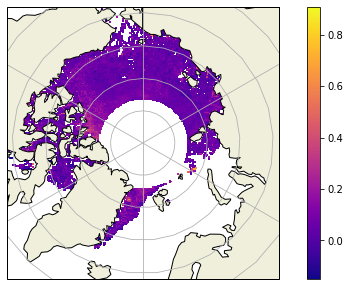

In [32]:
from regrid import regrid

lon = mask.get('lon')
lat = mask.get('lat')

d = get_field('cci_envisat', month='11',year=2009,variable='rad')
fb = d['field']
lon = d['lon']
lat = d['lat']
# data_dir = '/home/robbie/Dropbox/SM_Thickness/data/Components/'

# with xr.open_dataset(f'{data_dir}2009_components.nc') as data:

#     ds_month = data.where(int(11) == data.month, drop=True)

# fb = np.array(ds_month['free'])[0]

# fb_barents = select_region('Barents',fb)



# marg = select_region('marginals',ones)
print(fb.max())

not_nan_array = ~ np.isnan(fb)
clean_fb_array = np.array(fb)[not_nan_array]

print(clean_fb_array.max())

cartoplot(lon,lat,fb)

# cartoplot(lon,lat,fb_barents)

# print(np.nanmean(fb_barents))


# print(clean_fb_array)

In [35]:
result = np.where(fb == 0.90853065)
print(result)

print(lon[result])
print(lat[result])

(array([226]), array([162]))
[-78.89616656]
[77.77182577]


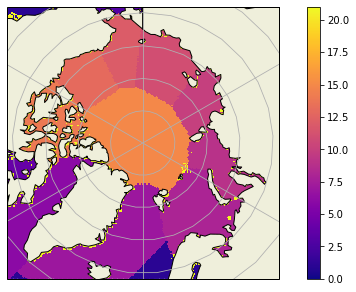

In [34]:
im = imageio.imread('/home/robbie/Dropbox/Data/J_Mask.tif')
mask = np.flipud(np.array(im))

cartoplot(lon,lat,mask)

In [4]:
dtypes = {'%date' : 'str',
          'time(UTC)' : 'int',
          'draft(m)' : 'float'}

directory = '/home/robbie/Dropbox/SM_Thickness/data/ULS/'

year = 2003

file = 'uls'+str(year)[2:]+'a_draft.dat'

data = pd.read_csv(directory+file,skiprows=1,delim_whitespace=True,dtype=dtypes)

print(data.head())

      %date  time(UTC)  draft(m)
0  20030814     194002      0.81
1  20030814     194004      1.09
2  20030814     194006      1.37
3  20030814     194008      1.57
4  20030814     194010      1.71


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(361), y(361)
    variables(dimensions): float32 E5 density(x,y), float32 E5 depth(x,y), float32 M2 density(x,y), float32 M2 depth(x,y), float32 density(x,y), float32 depth(x,y), float32 SWE(x,y), float32 lon(x,y), float32 lat(x,y)
    groups: 


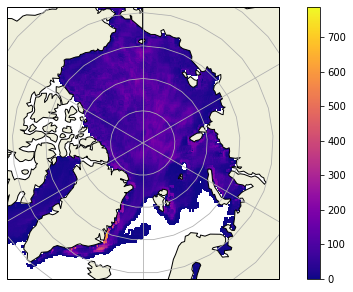

In [9]:
month = "02"
year = 1993

data_dir = '/home/robbie/Dropbox/SM_Thickness/data/SnowModel/monthly_means/'

f_name = f'{year}{month}.nc'

data = Dataset(data_dir + f_name)

print(data)

field = data['SWE']

cartoplot(mask.get('lon'), mask.get('lat'), field)

[[99980000. 99980000. 99980000. ... 99980000. 99980000. 99980000.]
 [99980000. 99980000. 99980000. ... 99980000. 99980000. 99980000.]
 [99980000. 99980000. 99980000. ... 99980000. 99980000. 99980000.]
 ...
 [99980000. 99980000. 99980000. ... 99980000. 99980000. 99980000.]
 [99980000. 99980000. 99980000. ... 99980000. 99980000. 99980000.]
 [99980000. 99980000. 99980000. ... 99980000. 99980000. 99980000.]]


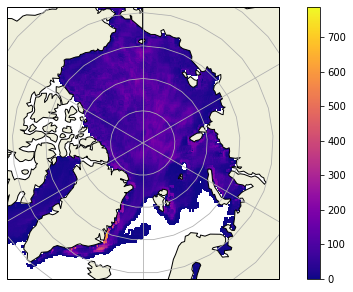

In [16]:
data_dir = '/home/robbie/Dropbox/SM_Thickness/data/SnowModel/daily_data/'

with xr.open_dataset(f'{data_dir}{year}{month}.nc') as data:

    ds_day = data.where(int(day) == data.day, drop=True)
    
SWE = np.array(ds_day['SWE'][0])

print(SWE)

cartoplot(mask.get('lon'), mask.get('lat'), field)

(432,) (432,) (432, 432)


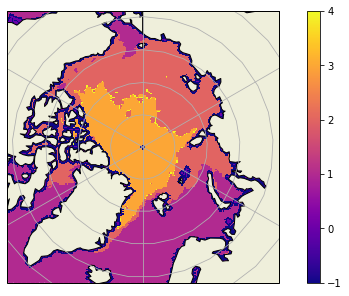

In [23]:
day=10
month=11
year=2010

data_dir = f'/home/robbie/Dropbox/SM_Thickness/data/daily_type_at_buoy/'
f_name = f'{year}_{month}_{day}.nc'
data = Dataset(data_dir+f_name)

print(data['lon'][0].shape,data['lat'][0].shape,data['ice_type'][0].shape)



cartoplot(data['lon'],data['lat'],data['ice_type'][0])
